In [84]:
import random
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd
import matplotlib.pyplot as plt

### Punto 1

In [12]:
x = sy.symbols('x')
funcion = sy.exp(0.01 * x) * sy.sin(x) - x ** 3
funcion_lambda = sy.lambdify(x, funcion, 'numpy')

In [14]:
funcion

-x**3 + exp(0.01*x)*sin(x)

a) Gráfica para buscar las posibles raíces

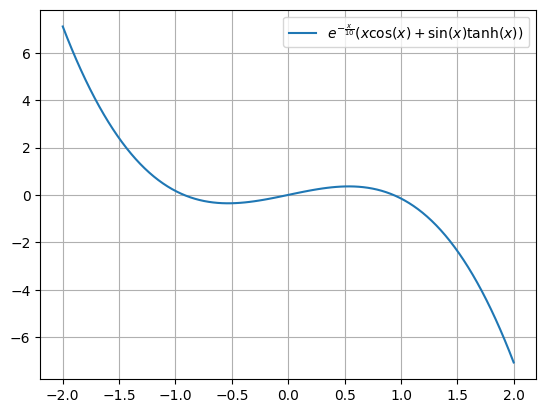

In [17]:
arreglo = np.linspace(-2, 2, 100)
plt.plot(arreglo, funcion_lambda(arreglo), label=r'$e^{-\frac{x}{10}}(x \cos(x) + \sin(x) \tanh(x))$')
plt.legend()
plt.grid()
plt.show()

b) Método numérico para hallar las raíces

In [29]:
# newton raphson para hallar las raices
fprime = sy.diff(funcion, x)
fprime_lambda = sy.lambdify(x, fprime, 'numpy')
# los puntos a tomar iniciales
iniciales = [-2, 2]
epsilon = 1e-6
nmax = 100
for inicial in iniciales:
    i = 0
    x0 = inicial
    while i < nmax:
        x1 = x0 - funcion_lambda(x0) / fprime_lambda(x0)
        if abs(x1 - x0) < epsilon:
            break
        x0 = x1
        i += 1
    print("Raíz en " + str(x1) + " hallada en " + str(i) + " iteraciones")

Raíz en -0.9249062059948815 hallada en 6 iteraciones
Raíz en 0.9323873629866809 hallada en 6 iteraciones


c) Justificación:
Se usó el método de Newton-Raphson ya que logró una precisión de $1\mathrm{e}{-10}$ en sólo 6 iteraciones de 100 posibles

### Punto 2

In [37]:
x = sy.symbols("x")
funcion_a_integrar = 0.5 * (1 - x) ** 2 * (2 - 2 * x) * sy.exp(2 * x - x ** 2)
funcion_a_integrar_lambda = sy.lambdify(x, funcion_a_integrar, 'numpy')

a) Método de Simpson

In [31]:
def integracion_simpson_un_tercio(f, a, b, n):
    h = (b-a)/n
    x = np.linspace(a, b, n+1)
    # esta manipulación de arreglo permite operar directamente en el array sin necesidad de una funcion auxiliar para cada subintervalo
    return h/3 * (f(a) + 4*np.sum(f(x[1:-1:2])) + 2*np.sum(f(x[2:-1:2])) + f(b))

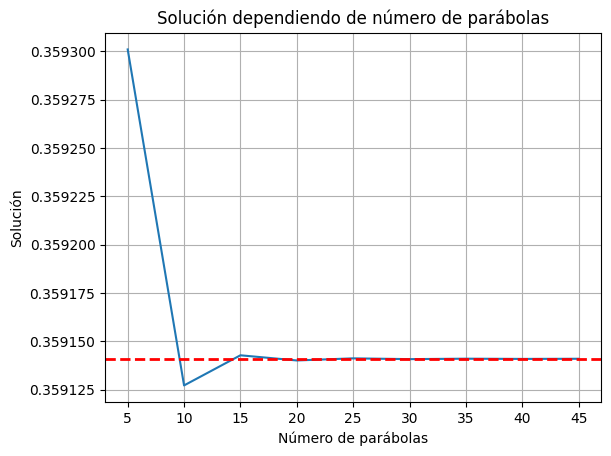

In [174]:
soluciones = []
cantidad = list(range(5,50,5))
for i in cantidad:
    soluciones.append(integracion_simpson_un_tercio(funcion_a_integrar_lambda, 0, 1, i))

plt.plot(cantidad, soluciones)
plt.axhline(integracion_simpson_un_tercio(funcion_a_integrar_lambda, 0, 1, 100), color='red', lw=2, ls='--')
plt.title("Solución dependiendo de número de parábolas")
plt.ylabel('Solución')
plt.xlabel('Número de parábolas')
plt.grid()
plt.show()

Método Monte Carlo

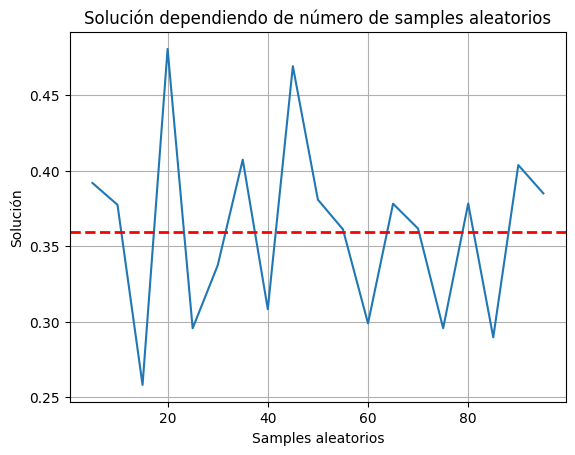

In [175]:
soluciones = []
cantidad = list(range(5,100,5))
for i in cantidad:
    solucion = 0
    for _ in range(i):
        solucion += funcion_a_integrar_lambda(np.random.rand())
    soluciones.append(solucion / i)

plt.plot(cantidad, soluciones)
plt.axhline(integracion_simpson_un_tercio(funcion_a_integrar_lambda, 0, 1, 100), color='red', lw=2, ls='--')
plt.title("Solución dependiendo de número de samples aleatorios")
plt.ylabel('Solución')
plt.xlabel('Samples aleatorios')
plt.grid()
plt.show()

Método del trapecio

In [176]:
def trapecio(funcion, li, ls, cant_trapecios):
    suma = 0
    altura = (ls-li)/cant_trapecios
    for i in range(1,cant_trapecios):
        suma += funcion(li+i*altura)
    return (altura/2)*(funcion(li)+2*suma+funcion(ls))

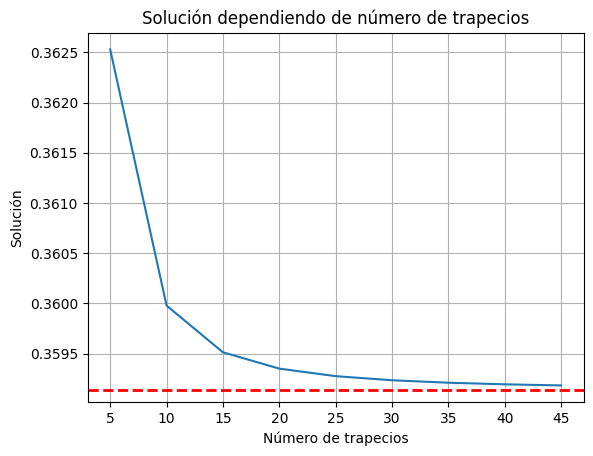

In [173]:
soluciones = []
cantidad = list(range(5,50,5))
for i in cantidad:
    soluciones.append(trapecio(funcion_a_integrar_lambda, 0, 1, i))

plt.plot(cantidad, soluciones)
plt.axhline(integracion_simpson_un_tercio(funcion_a_integrar_lambda, 0, 1, 100), color='red', lw=2, ls='--')
plt.title("Solución dependiendo de número de trapecios")
plt.ylabel('Solución')
plt.xlabel('Número de trapecios')
plt.grid()
plt.show()

b) Si tuviera que entregar un sólo resultado de la integral, ¿cuál sería?

El resultado que entregaría sería el del método de Simpson, ya que para esta función en particular, que es analítica e involucra sólo polinomios y una exponencial, el ajuste polinómico que provee el método de Simpson es bastante más preciso que cualquiera de los otros dos.

### Punto 3

a) Solución mediante Runge-Kutta 4

Se escogió el método de Runge-Kutta ya que al requerir 30 puntos, la propagación del error mediante Euler sería muy alta y por tanto la solución encontrada sería no óptima.

In [63]:
def runge_kutta_4_reversa(f, li, ls, cant_puntos, y0):
    h = (ls-li)/(cant_puntos-1)
    datos = []
    x = ls
    for _ in np.linspace(li, ls, cant_puntos)[::-1]:
        datos.append((x, y0))
        k1 = h * f(x, y0)
        k2 = h * f(x - 0.5*h, y0 - 0.5*k1)
        k3 = h * f(x - 0.5*h, y0 - 0.5*k2)
        k4 = h * f(x - h, y0 - k3)
        y0 = y0 - (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        x -= h
    return datos

In [74]:
x, y = sy.symbols('x y')
ecuacion_diferencial = (- x + sy.sqrt(x ** 2 + y ** 2)) / y
ecuacion_diferencial_lambda = sy.lambdify([x, y], ecuacion_diferencial, 'numpy')
solucion = runge_kutta_4_reversa(ecuacion_diferencial_lambda, -10, 5, 30, -61.3)

In [75]:
df = pd.DataFrame(solucion, columns=['x', 'y'])
print(df)

            x          y
0    5.000000 -61.300000
1    4.482759 -60.821362
2    3.965517 -60.338926
3    3.448276 -59.852603
4    2.931034 -59.362295
5    2.413793 -58.867904
6    1.896552 -58.369325
7    1.379310 -57.866451
8    0.862069 -57.359168
9    0.344828 -56.847359
10  -0.172414 -56.330899
11  -0.689655 -55.809661
12  -1.206897 -55.283508
13  -1.724138 -54.752300
14  -2.241379 -54.215886
15  -2.758621 -53.674113
16  -3.275862 -53.126814
17  -3.793103 -52.573819
18  -4.310345 -52.014944
19  -4.827586 -51.450000
20  -5.344828 -50.878782
21  -5.862069 -50.301078
22  -6.379310 -49.716662
23  -6.896552 -49.125294
24  -7.413793 -48.526720
25  -7.931034 -47.920670
26  -8.448276 -47.306856
27  -8.965517 -46.684972
28  -9.482759 -46.054692
29 -10.000000 -45.415666


b) Graficación de resultados

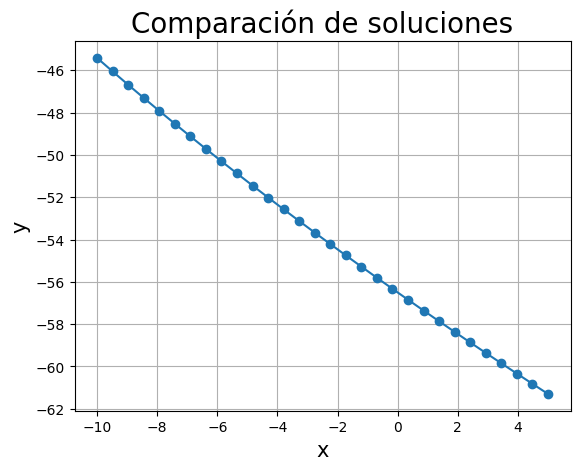

In [76]:
plt.plot(df['x'], df['y'], marker='o')
plt.title("Comparación de soluciones", size=20)
plt.ylabel('y', size=15)
plt.xlabel('x', size=15)
plt.grid()
plt.show()

c) Hallar $y(0)$

In [82]:
# hacemos interpolacion de splines que nos permite evaluar en un punto
cs = sp.interpolate.CubicSpline(np.flip(df['x']), np.flip(df['y']))
print(cs(0))

-56.503577143047146


### Punto 4

Creamos una lista de elecciones, y un diccionario que almacena las combinaciones que dan la victoria

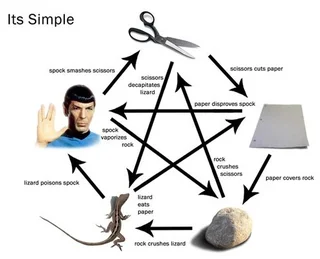

In [4]:
lista = ["hola", 4, '@']

diccionario = {
    "hola": 4,
    "@": 1
}

diccionario['@']

1

In [8]:
import random

elecciones = ["piedra", "papel", "tijera", "lagarto", "spock"]
victoria = {
    # estamos almacenando las "movidas" a las que le gana cada otra movida
    # piedra le gana a tijera y lagarto
    "piedra": ["tijera", "lagarto"],
    # papel le gana a piedra y spock
    "papel": ["piedra", "spock"],
    # etc
    "tijera": ["papel", "lagarto"],
    "lagarto": ["spock", "papel"],
    "spock": ["piedra", "tijera"],
}


#cuales son las jugadas con las que pierde cada otra jugada
derrotas = {
    "tijera": ["spock, piedra"]
    # etc
}

# jugador1 = piedra
# jugador2 = tijera

# queremos mirar si piedra le gana a tijera
# o tijera le gana a piedra
# victoria['piedra'] = tijera, lagarto
# como jugador2 es tijera -> jugador2 in victoria[jugador1]

Simulamos una prueba

In [12]:
jugador1 = 0
jugador2 = 0

# simular indefinidamente
# queremos hallar el primero de 3
# por eso while True
while True:
    # revisamos si alguno ya ganó 3
    if jugador1 == 3 or jugador2 == 3:
        break
    # jugador1 escoge aleatoriamente de ["piedra", "papel", "tijera", "lagarto", "spock"]
    eleccion1 = random.choice(elecciones)
    # jugador2 también
    eleccion2 = random.choice(elecciones)
    # aquí, los valores de eleccion1 y eleccion2 están en ["piedra", "papel", "tijera", "lagarto", "spock"]

    # parte de la lógica del juego

    # ejemplo: eleccion2 = "tijera" y eleccion1 = "piedra"
    
    # victoria[eleccion1] = victoria["piedra"] = ["tijera", "lagarto"]
    # eleccion2 = "tijera"
    # está tijera en victoria["piedra"] ?? si
    if eleccion2 in victoria[eleccion1]:
        # está piedra en victoria['tijera'] ?
        # falso
        print(eleccion1 + " gana a " + eleccion2)
        jugador1 += 1
    elif eleccion1 == eleccion2:
        # piedra == tijera ??
        print(eleccion1 + " empata con " + eleccion2)
        continue
    else:
        # la unica alternativa es que piedra gane
        print(eleccion1 + " pierde con " + eleccion2)
        jugador2 += 1
print(jugador1, jugador2)

lagarto gana a spock
tijera gana a lagarto
piedra gana a tijera
3 0


Ahora calculemos experimentalmente la probabilidad de ganar

In [13]:
def simular_juego():
    elecciones = ["piedra", "papel", "tijera", "lagarto", "spock"]
    resultados = {
        "piedra": ["tijera", "lagarto"],
        "papel": ["piedra", "spock"],
        "tijera": ["papel", "lagarto"],
        "lagarto": ["spock", "papel"],
        "spock": ["piedra", "tijera"],
    }
    jugador1 = 0
    jugador2 = 0
    while True:
        if jugador1 == 3:
            return True
        if jugador2 == 3:
            return False
        eleccion1 = random.choice(elecciones)
        eleccion2 = random.choice(elecciones)
        if eleccion2 in resultados[eleccion1]:
            jugador1 += 1
        elif eleccion1 == eleccion2:
            continue
        else:
            jugador2 += 1

In [21]:
simular_juego()

True

In [23]:
def simular_juegos(n):
    jugador1 = 0
    jugador2 = 0
    for _ in range(n):
        if simular_juego():
            jugador1 += 1
        else:
            jugador2 += 1
    
    return (jugador1, jugador2)

In [30]:
simular_juegos(10000)

(5058, 4942)

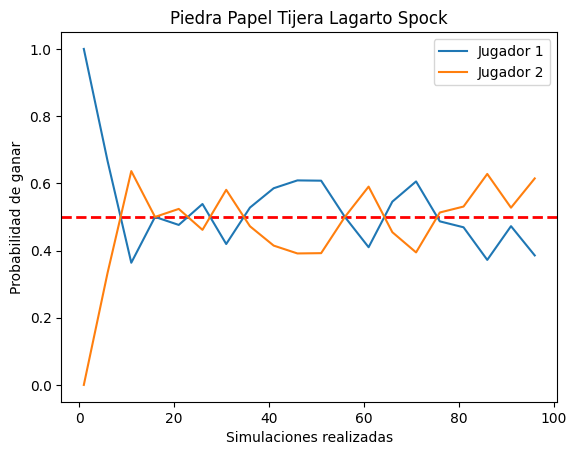

In [177]:
simulaciones = list(range(1, 100, 5))
resultados = []
for i in simulaciones:
    resultados.append(np.array(simular_juegos(i)) / i)

np.array(resultados).T[0]
np.array(resultados).T[1]
plt.title("Piedra Papel Tijera Lagarto Spock")
plt.ylabel('Probabilidad de ganar')
plt.xlabel('Simulaciones realizadas')
plt.axhline(0.5, color='red', lw=2, ls='--')
plt.plot(simulaciones, np.array(resultados).T[0], label="Jugador 1")
plt.plot(simulaciones, np.array(resultados).T[1], label="Jugador 2")
plt.legend()

plt.show()

Lógicamente la probabilidad de ganar es del 50%, es un juego de 2 jugadores que es en teoría justo, esto concuerda con la simulación.